<a href="https://colab.research.google.com/github/CarolRealpe/Medicamentos/blob/main/EDA_Medicamentos_POS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MEDICAMENTOS_POS_20251124.csv")

df.head()


,atc,principioactivo,descripcionatc,producto,expediente,registrosanitario,fechavencimiento,estadoregistro,descripcioncomercial,unidad,viaadministracion,concentracion,unidadmedida,cantidad,unidadreferencia,formafarmaceutica,nombrerol
0,S01BC03,DICLOFENACO SODICO,DICLOFENAC,3- A OFTENO,"230,339",INVIMA 2008 M-012122 R-1,01/01/3000,Vigente,CAJA DESIN DATOCARTÓN CONSIN DATOFRASCOSIN DAT...,ml,CONJUNTIVAL,C,mg,1,MILILITRO,SOLUCION OFTALMICA,LABORATORIOS SOPHIA S.A. DE C.V.
1,S01BC03,DICLOFENACO SODICO,DICLOFENAC,3- A OFTENO,"230,339",INVIMA 2008 M-012122 R-1,01/01/3000,Vigente,CAJA DESIN DATOCARTÓN CONSIN DATOFRASCOSIN DAT...,ml,CONJUNTIVAL,C,mg,1,MILILITRO,SOLUCION OFTALMICA,LABORATORIOS SOPHIA DE COLOMBIA LTDA.
2,S01BC03,DICLOFENACO SODICO,DICLOFENAC,3- A OFTENO,"230,339",INVIMA 2008 M-012122 R-1,01/01/3000,Vigente,MUESTRA MEDICA :CAJASIN DATOCONSIN DATOUN FRAS...,ml,CONJUNTIVAL,C,mg,1,MILILITRO,SOLUCION OFTALMICA,LABORATORIOS SOPHIA DE COLOMBIA LTDA.
3,S01BC03,DICLOFENACO SODICO,DICLOFENAC,3- A OFTENO,"230,339",INVIMA 2008 M-012122 R-1,01/01/3000,Vigente,MUESTRA MEDICA :CAJASIN DATOCONSIN DATOUN FRAS...,ml,CONJUNTIVAL,C,mg,1,MILILITRO,SOLUCION OFTALMICA,LABORATORIOS SOPHIA S.A. DE C.V.
4,D08AC52,ALCOHOL ETILICO AL 92.44% EQUIVALENTE A ALCOHO...,CLORHEXIDINA COMBINACIONES,3M AVAGARD,"19,948,203",INVIMA 2016M-0005076-R1,NaN,Vigente,BOTELLA DE POLIETILENO DE ALTA DENSIDAD DE 500...,U,TOPICA (EXTERNA),B,g,65.78,100 G,SOLUCION TOPICA,ACCUPAC INC.


In [11]:
print("Filas y columnas:", df.shape)

print("\nTipos de datos:")
print(df.dtypes)

print("\nValores faltantes por columna:")
print(df.isnull().sum())

df.describe(include="all")

Filas y columnas: (159840, 17)

Tipos de datos:
atc                     object
principioactivo         object
descripcionatc          object
producto                object
expediente              object
registrosanitario       object
fechavencimiento        object
estadoregistro          object
descripcioncomercial    object
unidad                  object
viaadministracion       object
concentracion           object
unidadmedida            object
cantidad                object
unidadreferencia        object
formafarmaceutica       object
nombrerol               object
dtype: object

Valores faltantes por columna:
atc                          0
principioactivo              0
descripcionatc               0
producto                     0
expediente                   0
registrosanitario            0
fechavencimiento        121929
estadoregistro               0
descripcioncomercial        23
unidad                       0
viaadministracion            0
concentracion                0
unidadm

,atc,principioactivo,descripcionatc,producto,expediente,registrosanitario,fechavencimiento,estadoregistro,descripcioncomercial,unidad,viaadministracion,concentracion,unidadmedida,cantidad,unidadreferencia,formafarmaceutica,nombrerol
count,159840,159840,159840,159840,159840,159840,37911,159840,159817,159840,159840,159840,159840,159840,157230,159840,159840
unique,1596,6266,1445,9601,9838,9838,243,1,63733,12,47,7,87,1091,2207,103,2346
top,N02BE51,ACETAMINOFEN,PARACETAMOL COMBINACIONES EXCLUYENDO SICOLEPTICOS,HIDRAPLUS® 45 CON ZINC,"20,042,480",INVIMA 2020M-0013239-R1,01/01/3000,Vigente,CAJA POR 10 VIALES DE VIDRIO TIPO I CON TAPÓN ...,U,ORAL,A,mg,10,TABLETA RECUBIERTA,TABLETA RECUBIERTA,PROCAPS S.A.
freq,5689,2038,5689,1505,1505,1505,23389,159840,92,147477,107158,119951,122445,9707,22396,32236,7145


In [12]:
df = df.drop_duplicates()
print("Nuevas dimensiones (sin duplicados):", df.shape)

Nuevas dimensiones (sin duplicados): (157651, 17)


In [30]:
df = df.apply(lambda col: col.str.upper() if col.dtype == "object" else col)
df = df.fillna("SIN_DATO")

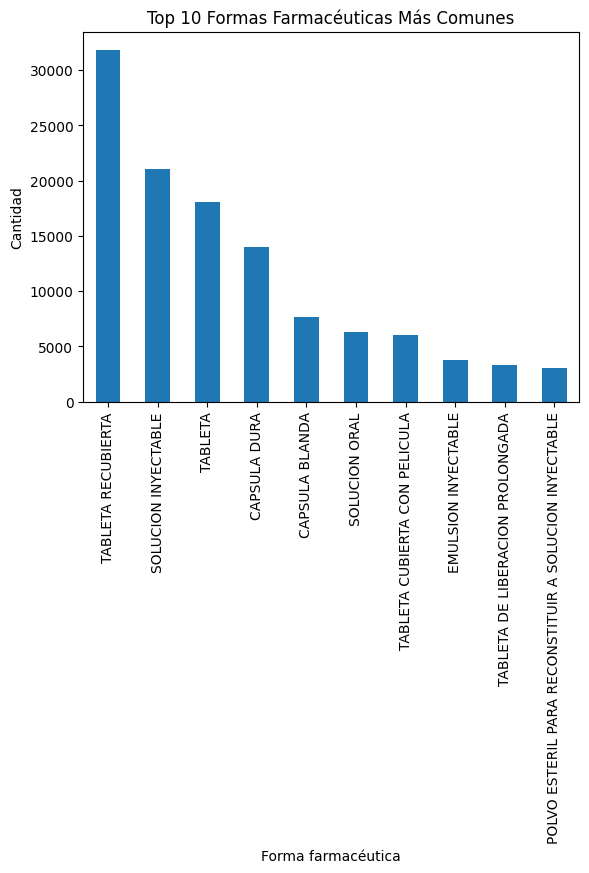

In [16]:
df['formafarmaceutica'].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 Formas Farmacéuticas Más Comunes")
plt.xlabel("Forma farmacéutica")
plt.ylabel("Cantidad")
plt.show()


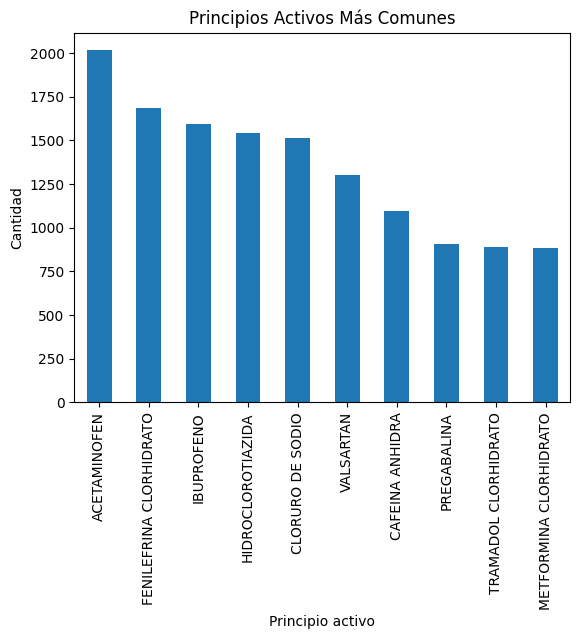

In [21]:
df['principioactivo'].value_counts().head(10).plot(kind="bar")
plt.title("Principios Activos Más Comunes")
plt.xlabel("Principio activo")
plt.ylabel("Cantidad")
plt.show()


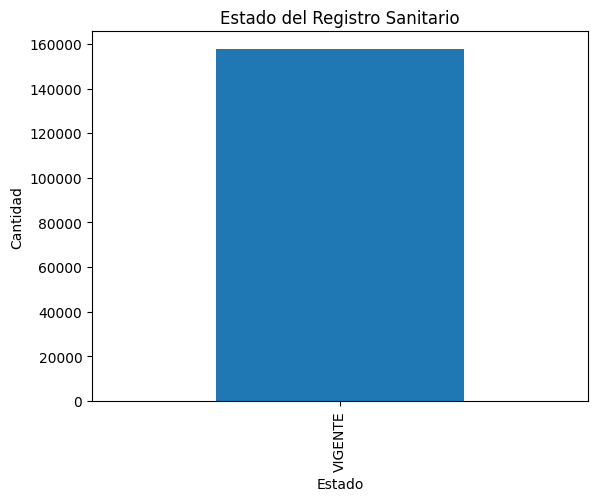

In [23]:
df['estadoregistro'].value_counts().plot(kind="bar")
plt.title("Estado del Registro Sanitario")
plt.xlabel("Estado")
plt.ylabel("Cantidad")
plt.show()


/tmp/ipython-input-2559627269.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['anio_venc'] = pd.to_datetime(df['fechavencimiento'], errors='coerce').dt.year


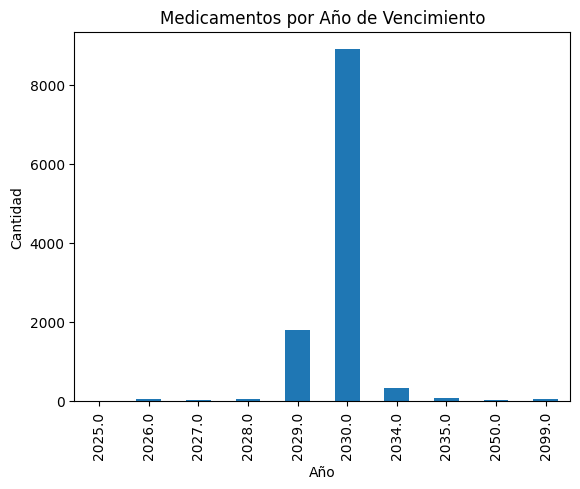

In [24]:
df['anio_venc'] = pd.to_datetime(df['fechavencimiento'], errors='coerce').dt.year
df['anio_venc'].value_counts().sort_index().plot(kind="bar")
plt.title("Medicamentos por Año de Vencimiento")
plt.xlabel("Año")
plt.ylabel("Cantidad")
plt.show()


In [25]:
df.info()
df.describe(include='all')
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
Index: 157651 entries, 0 to 159839
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   atc                   157651 non-null  object 
 1   principioactivo       157651 non-null  object 
 2   descripcionatc        157651 non-null  object 
 3   producto              157651 non-null  object 
 4   expediente            157651 non-null  object 
 5   registrosanitario     157651 non-null  object 
 6   fechavencimiento      157651 non-null  object 
 7   estadoregistro        157651 non-null  object 
 8   descripcioncomercial  157651 non-null  object 
 9   unidad                157651 non-null  object 
 10  viaadministracion     157651 non-null  object 
 11  concentracion         157651 non-null  object 
 12  unidadmedida          157651 non-null  object 
 13  cantidad              157651 non-null  object 
 14  unidadreferencia      157651 non-null  object 
 15  forma

,0
atc,0
principioactivo,0
descripcionatc,0
producto,0
expediente,0
registrosanitario,0
fechavencimiento,0
estadoregistro,0
descripcioncomercial,0
unidad,0


In [26]:
df_clean = df.copy()

df_clean['concentracion'] = pd.to_numeric(df_clean['concentracion'], errors='coerce')
df_clean['cantidad'] = pd.to_numeric(df_clean['cantidad'], errors='coerce')


In [28]:
df["principioactivo"].value_counts().head(10)


,count
principioactivo,
ACETAMINOFEN,2016
FENILEFRINA CLORHIDRATO,1684
IBUPROFENO,1594
HIDROCLOROTIAZIDA,1543
CLORURO DE SODIO,1514
VALSARTAN,1302
CAFEINA ANHIDRA,1094
PREGABALINA,909
TRAMADOL CLORHIDRATO,887


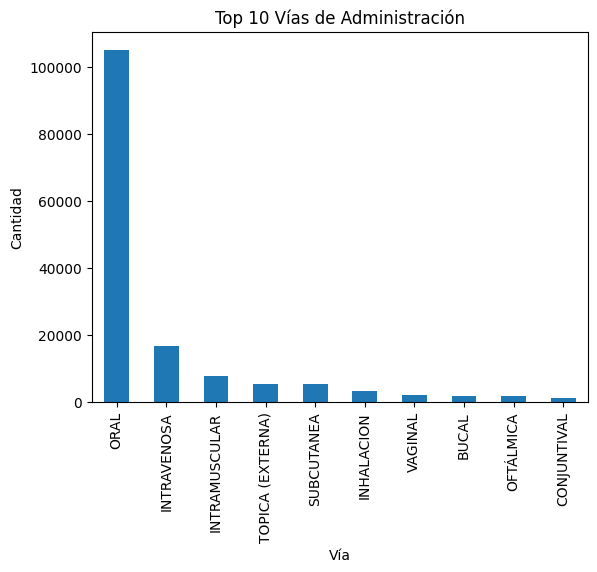

In [29]:
df["viaadministracion"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 Vías de Administración")
plt.xlabel("Vía")
plt.ylabel("Cantidad")
plt.show()
